# New Section

In [ ]:
!pip install --upgrade pip
!pip install pkbar
!pip install -U skorch

     |████████████████████████████████| 1.7 MB 7.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 155 kB 9.2 MB/s            


In [ ]:
!pip install visualization

In [ ]:
pip install pytorchtools

In [ ]:
import time
import skorch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.cuda
import torch.nn as nn
import torch.nn.functional as F
# import visualisation_tools as vis_utils
from pkbar import Kbar
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from typing import List, Union, Callable, Any, Optional, Tuple
# from lstm_harness import ChunkLoader, ModelInfo, TTVHarness, WindowedDataset, PrecomputedScaler, LSTMBatcher
# from pytorchtools import Early/Stopping

notebook_start_time = time.perf_counter()
def post_transform(data: pd.DataFrame):
    return scaler.transform(data.to_numpy())
def pre_transform(data: torch.Tensor):
    return data.float()                    #convert tensor to float for processing by LSTM

use_diff = False
use_diff_int = (1 if use_diff else 0)
use_cuda = torch.cuda.is_available()
if(use_cuda):
    torch.cuda.init()
    "Using CUDA"

In [9]:
df_1 = pd.read_csv("/content/drive/MyDrive/Sensor hack/Subdataset1.csv",parse_dates = ['DATETIME'])
df_2 = pd.read_csv("/content/drive/MyDrive/Sensor hack/Subdataset2.csv",parse_dates = ['DATETIME'])

In [ ]:
df_1

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,2018-06-01 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,1,0,0,35.536686,1,0,0,0.0,0,49.809330,1,34.350811,1,0,0,30.512712,1,0.0,0,81.605408,1,2.974053,33.506031,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,2018-06-01 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,1,0,0,34.454914,1,0,0,0.0,0,48.921925,1,34.219593,1,0,0,30.480455,1,0.0,0,81.181030,1,2.974005,33.453247,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,2018-06-01 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,1,0,0,33.487091,1,0,0,0.0,0,48.555843,1,33.560364,1,0,0,29.068352,1,0.0,0,83.643311,1,2.974333,33.818413,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,2018-06-01 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,1,0,0,32.585545,1,0,0,0.0,0,47.823227,1,0.000000,0,0,0,29.890045,1,0.0,0,87.657402,1,2.974740,34.274750,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,2018-06-01 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,1,0,0,31.469677,1,0,0,0.0,0,46.558678,1,0.000000,0,0,0,29.812771,1,0.0,0,88.074234,1,2.974847,34.395435,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2019-05-01 20:00:00,3.349998,3.393529,3.704372,3.318569,1.976920,5.500000,4.797106,96.594833,1,96.613831,1,0,0,0.000000,0,0,0,0.0,0,50.868664,1,35.932934,1,0,0,29.866179,1,0.0,0,82.677170,1,2.975208,34.801918,28.982214,71.224411,28.940384,84.560669,21.076448,81.414070,20.970821,71.399384,31.532953,30.632954
8757,2019-05-01 21:00:00,3.262380,3.738153,3.319207,3.162533,2.355615,5.207708,3.493474,96.445862,1,96.464813,1,0,0,0.000000,0,0,0,0.0,0,50.965359,1,38.114395,1,0,0,0.000000,0,0.0,0,81.965385,1,2.975278,34.881859,29.289864,69.354080,29.247887,84.673790,26.999941,83.265991,26.999941,52.213036,31.836996,30.936996
8758,2019-05-01 22:00:00,3.114685,3.948144,3.123156,3.060679,2.593729,4.997561,2.207609,96.929070,1,96.948166,1,0,0,37.008854,1,0,0,0.0,0,50.560604,1,35.499474,1,0,0,31.198389,1,0.0,0,82.533981,1,2.975049,34.622402,28.281702,86.823753,28.358240,84.593727,20.571791,81.679344,20.457272,66.498741,31.281141,30.381142
8759,2019-05-01 23:00:00,2.931601,3.892631,3.542954,3.025374,2.923712,5.104730,2.071863,97.206474,1,97.225647,1,0,0,36.427517,1,0,0,0.0,0,50.834183,1,35.245262,1,0,0,31.060823,1,0.0,0,81.418022,1,2.974916,34.473240,28.224844,87.819832,28.297560,83.987007,20.450956,82.001610,20.337372,66.844086,31.210789,30.310789


In [ ]:
df_2

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,2020-04-07 00:00:00,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1,93.65,1,0,0,0.00,0,0,0,0.00,0,49.84,1,35.54,1,0,0,29.87,1,0.0,0,0.00,0,2.98,36.38,28.26,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64
1,2020-04-07 01:00:00,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1,89.43,1,0,0,34.26,1,0,0,0.00,0,48.38,1,37.83,1,0,0,0.00,0,0.0,0,0.00,0,2.98,38.60,24.39,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15
2,2020-04-07 02:00:00,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1,89.89,1,0,0,32.97,1,0,0,0.00,0,46.84,1,37.31,1,0,0,0.00,0,0.0,0,0.00,0,2.98,38.36,23.84,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56
3,2020-04-07 03:00:00,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1,88.12,1,0,0,33.27,1,0,0,0.00,0,0.00,0,0.00,0,0,0,32.68,1,0.0,0,0.00,0,2.98,39.29,27.00,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38
4,2020-04-07 04:00:00,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1,87.03,1,0,0,32.99,1,0,0,0.00,0,0.00,0,0.00,0,0,0,32.81,1,0.0,0,0.00,0,2.98,39.85,26.67,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,2020-12-24 20:00:00,2.65,2.37,3.85,3.04,3.82,4.94,2.19,120.08,1,0.00,0,0,0,0.00,0,0,0,0.00,0,50.30,1,34.27,1,0,0,30.71,1,0.0,0,67.23,1,2.99,21.70,27.42,70.03,27.38,84.14,18.45,81.67,18.34,66.04,29.88,28.98
4173,2020-12-24 21:00:00,2.24,2.56,3.42,2.92,3.69,5.02,1.97,119.12,1,0.00,0,0,0,0.00,0,0,0,0.00,0,50.78,1,0.00,0,0,0,32.47,1,0.0,0,70.89,1,2.99,22.25,27.71,68.60,27.66,83.46,25.40,60.85,25.28,66.89,30.19,29.29
4174,2020-12-24 22:00:00,1.91,2.76,2.95,2.49,2.70,5.14,1.87,120.71,1,0.00,0,0,0,36.84,1,0,0,0.00,0,50.69,1,0.00,0,0,0,32.43,1,0.0,0,66.71,1,2.99,21.33,26.77,85.63,26.84,82.82,24.46,59.56,24.34,66.08,29.68,28.78
4175,2020-12-24 23:00:00,1.52,2.52,3.33,2.03,1.69,5.10,1.39,120.02,1,0.00,0,0,0,35.98,1,0,0,36.94,1,36.92,1,0.00,0,0,0,32.42,1,0.0,0,76.14,1,2.99,21.74,25.75,86.15,25.78,103.63,24.77,59.01,24.65,66.42,28.98,28.08


In [ ]:
df_1.dtypes

DATETIME    datetime64[ns]
L_T1               float64
L_T2               float64
L_T3               float64
L_T4               float64
L_T5               float64
L_T6               float64
L_T7               float64
F_PU1              float64
S_PU1                int64
F_PU2              float64
S_PU2                int64
F_PU3                int64
S_PU3                int64
F_PU4              float64
S_PU4                int64
F_PU5                int64
S_PU5                int64
F_PU6              float64
S_PU6                int64
F_PU7              float64
S_PU7                int64
F_PU8              float64
S_PU8                int64
F_PU9                int64
S_PU9                int64
F_PU10             float64
S_PU10               int64
F_PU11             float64
S_PU11               int64
F_V2               float64
S_V2                 int64
P_J280             float64
P_J269             float64
P_J300             float64
P_J256             float64
P_J289             float64
P

In [ ]:
test, use_diff = False, False
path = "/content/drive/MyDrive/Sensor hack/Subdataset1.csv"
data = pd.read_csv(path, parse_dates=False).drop("DATETIME", axis=1)
if(use_diff):
    data = data.diff()
in_out_features, curr_epoch = data.shape[1], 0
train_split, validation_split, test_split = 0.8, 0.1, 0.1
data

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,1,0,0,35.536686,1,0,0,0.0,0,49.809330,1,34.350811,1,0,0,30.512712,1,0.0,0,81.605408,1,2.974053,33.506031,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,1,0,0,34.454914,1,0,0,0.0,0,48.921925,1,34.219593,1,0,0,30.480455,1,0.0,0,81.181030,1,2.974005,33.453247,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,1,0,0,33.487091,1,0,0,0.0,0,48.555843,1,33.560364,1,0,0,29.068352,1,0.0,0,83.643311,1,2.974333,33.818413,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,1,0,0,32.585545,1,0,0,0.0,0,47.823227,1,0.000000,0,0,0,29.890045,1,0.0,0,87.657402,1,2.974740,34.274750,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,1,0,0,31.469677,1,0,0,0.0,0,46.558678,1,0.000000,0,0,0,29.812771,1,0.0,0,88.074234,1,2.974847,34.395435,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,3.349998,3.393529,3.704372,3.318569,1.976920,5.500000,4.797106,96.594833,1,96.613831,1,0,0,0.000000,0,0,0,0.0,0,50.868664,1,35.932934,1,0,0,29.866179,1,0.0,0,82.677170,1,2.975208,34.801918,28.982214,71.224411,28.940384,84.560669,21.076448,81.414070,20.970821,71.399384,31.532953,30.632954
8757,3.262380,3.738153,3.319207,3.162533,2.355615,5.207708,3.493474,96.445862,1,96.464813,1,0,0,0.000000,0,0,0,0.0,0,50.965359,1,38.114395,1,0,0,0.000000,0,0.0,0,81.965385,1,2.975278,34.881859,29.289864,69.354080,29.247887,84.673790,26.999941,83.265991,26.999941,52.213036,31.836996,30.936996
8758,3.114685,3.948144,3.123156,3.060679,2.593729,4.997561,2.207609,96.929070,1,96.948166,1,0,0,37.008854,1,0,0,0.0,0,50.560604,1,35.499474,1,0,0,31.198389,1,0.0,0,82.533981,1,2.975049,34.622402,28.281702,86.823753,28.358240,84.593727,20.571791,81.679344,20.457272,66.498741,31.281141,30.381142
8759,2.931601,3.892631,3.542954,3.025374,2.923712,5.104730,2.071863,97.206474,1,97.225647,1,0,0,36.427517,1,0,0,0.0,0,50.834183,1,35.245262,1,0,0,31.060823,1,0.0,0,81.418022,1,2.974916,34.473240,28.224844,87.819832,28.297560,83.987007,20.450956,82.001610,20.337372,66.844086,31.210789,30.310789


In [ ]:

#dataset parameters
window_size, batch_size = 129, 3
dataset_rows = (data.shape[0] - data.shape[0] % window_size) + (3 * use_diff_int)
if(dataset_rows > data.shape[0]):
    dataset_rows = data.shape[0]
train_rows, validation_rows, test_rows = int(dataset_rows * train_split), int(dataset_rows * validation_split), int(dataset_rows * test_split)
train_rows -= train_rows % window_size
validation_rows -= validation_rows % window_size
test_rows -= test_rows % window_size

train_chunk = \
    data[:train_rows]
    #ChunkLoader(csv_path=path, chunk_size=(train_rows//num_chunks), data_range=(0, train_rows)) 
    
validation_chunk = \
    data[train_rows:train_rows+validation_rows]
    #ChunkLoader(csv_path=path, chunk_size=(validation_rows//num_chunks), data_range=(train_rows, train_rows+validation_rows))

test_chunk = \
    data[train_rows+validation_rows: dataset_rows-1]
    #ChunkLoader(csv_path=path, chunk_size=(test_rows//num_chunks), data_range=(train_rows+validation_rows, dataset_rows-1))

scaler = StandardScaler()
scaler.fit(train_chunk)

StandardScaler()

In [ ]:
class AutoDataset(Dataset):
    """
    Creates a dataset for an autoencoder, i.e. where the input and output are the same.
    """
    
    def __init__(self, dataset: Union[Dataset, "array_like"]):
        self.dataset = dataset
        if(isinstance(self.dataset, pd.DataFrame)):
            self.dataset = torch.as_tensor(self.dataset.to_numpy())
        elif(isinstance(self.dataset, np.ndarray)):
            self.dataset = torch.as_tensor(self.dataset)
        elif(isinstance(self.dataset, torch.tensor)):
            pass
        else:
            self.dataset = torch.tensor(self.dataset)
    def __len__(self) -> int:
        return len(self.dataset)
    def __getitem__(self, idx:int) -> Tuple[torch.Tensor, torch.Tensor]:
        return (self.dataset[idx], self.dataset[idx])

In [ ]:
def plot_attack(cols: List, y_hat_df: pd.DataFrame, attack_df: pd.DataFrame):
    for col in cols:
        plt.plot(y_hat_df[col], 'b')
        plt.plot(attack_df[col], 'r')
        plt.show()

def run_attack(cols: List, attack_data: pd.DataFrame, use_diff: bool, slrange: slice):
    attack_set = WindowedDataset(dataset=attack_data, window_size=window_size, transform=post_transform)
    attack_loader = DataLoader(dataset=attack_set, batch_size=batch_size, collate_fn=LSTMBatcher, pin_memory=use_cuda, drop_last=True)
    if(slrange is None):
        slrange = slice(0, len(attack_loader))
    y_hat, y_act, losses = harness.evaluate(loader=attack_loader, return_labels=True, max_size=(slrange.start, slrange.stop))
    y_ahat_df = pd.DataFrame(torch.cat(y_hat, 0).numpy(), columns=cols)
    y_act_df = pd.DataFrame(torch.cat(y_act, 0).numpy(), columns=cols)
    plot_attack(cols, y_ahat_df, y_act_df)
    
def run_attack_on(path:str, cols:list, attack:bool, slrange:slice=None, use_diff:bool = False):
    all_attacks = pd.read_csv(path).drop("DATETIME", 1)
    if(use_diff):
        all_attacks = all_attacks.diff()
    no_attacks = all_attacks[all_attacks["ATT_FLAG"] == -999][cols]
    if(attack):
        first_attack_index = all_attacks[all_attacks["ATT_FLAG"] != -999].first_valid_index()
        attack_with_clean = all_attacks[cols][first_attack_index - (batch_size*5):]
        run_attack(cols, all_attacks[cols], use_diff, slrange)
    else:
        run_attack(cols, no_attacks, use_diff, slrange)

In [ ]:
train_dataset = WindowedDataset(dataset=train_chunk, window_size=window_size, transform=post_transform)
validation_set = WindowedDataset(dataset=validation_chunk, window_size=window_size, transform=post_transform)
test_set = WindowedDataset(dataset=test_chunk, window_size=window_size, transform=post_transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, collate_fn=LSTMBatcher, pin_memory=use_cuda, drop_last=True)
validation_loader = DataLoader(dataset=validation_set, batch_size=batch_size, collate_fn=LSTMBatcher, pin_memory=use_cuda, drop_last=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, collate_fn=LSTMBatcher, pin_memory=use_cuda, drop_last=True)

auto_train_loader = DataLoader(dataset=AutoDataset(dataset=train_chunk), batch_size=batch_size, pin_memory=use_cuda, drop_last=True)
auto_validation_loader = DataLoader(dataset=AutoDataset(dataset=validation_chunk), batch_size=batch_size, pin_memory=use_cuda, drop_last=True)
auto_test_loader = DataLoader(dataset=AutoDataset(dataset=test_chunk), batch_size=batch_size, pin_memory=use_cuda, drop_last=True)

print(f"Stored dataset lengths: (train, validation, test, sum) = {train_rows, validation_rows, test_rows, train_rows + validation_rows + test_rows}")
print(f"Calculated dataset lengths: (train, validation, test, sum) = {len(train_loader), len(validation_loader), len(test_loader), len(train_loader)+len(validation_loader)+len(test_loader)}")
print(f"train:validation:test :: {(100*train_rows)//dataset_rows}:{(100*validation_rows)//dataset_rows}:{(100*test_rows)//dataset_rows}")

# auto encoders

In [12]:
!git clone https://github.com/rtaormina/aeed.git

Cloning into 'aeed'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.


In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
# keras
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras import optimizers
import tensorflow as tf

# sklearn
from sklearn.metrics import mean_squared_error

# json
import json


# classes
class AutoEncoder(object):
    """ Keras-based AutoEncoder (AE) class used for event detection.
        Attributes:
        params: dictionary with parameters defining the AE structure,
    """
    def __init__(self, **kwargs):
        """ Class constructor, stores parameters and initialize AE Keras model. """

        # Default parameters values. If nI is not given, the code will crash later.
        params = {
            'nI': None,
            'nH': 3,
            'cf': 1,
            'activation' : 'tanh',
            'optimizer' : None,
            'verbose' : 0
            }

        for key,item in kwargs.items():
            params[key] = item

        self.params = params

    def create_model(self):
        """ Creates Keras AE model.
            The model has nI inputs, nH hidden layers in the encoder (and decoder)
            and cf compression factor. The compression factor is the ratio between
            the number of inputs and the innermost hidden layer which stands between
            the encoder and the decoder. The size of the hidden layers between the
            input (output) layer and the innermost layer decreases (increase) linearly
            according to the cg.
        """

        # retrieve params
        nI = self.params['nI'] # number of inputs
        nH = self.params['nH'] # number of hidden layers in encoder (decoder)
        cf = self.params['cf'] # compression factor
        activation = self.params['activation'] # autoencoder activation function
        optimizer = self.params['optimizer'] # Keras optimizer
        verbose = self.params['verbose'] # echo on screen

        # get number/size of hidden layers for encoder and decoder
        temp = np.linspace(nI,nI/cf,nH + 1).astype(int)
        nH_enc = temp[1:]
        nH_dec = temp[:-1][::-1]

        # input layer placeholder
        input_layer = Input(shape=(nI,))

        # build encoder
        for i, layer_size in enumerate(nH_enc):
            if i == 0:
                # first hidden layer
                encoder = Dense(layer_size, activation=activation)(input_layer)
            else:
                # other hidden layers
                encoder = Dense(layer_size, activation=activation)(encoder)

        # build decoder
        for i, layer_size in enumerate(nH_dec):
            if i == 0:
                # first hidden layer
                decoder = Dense(layer_size, activation=activation)(encoder)
            else:
                # other hidden layers
                decoder = Dense(layer_size, activation=activation)(decoder)

        # create autoencoder
        autoencoder = Model(input_layer, decoder)
        if optimizer == None:
            optimizer = tf.keras.optimizers.Adam(lr = 0.001)

        # print autoencoder specs
        if verbose > 0:
            print('Created autoencoder with structure:');
            print(', '.join('layer_{}: {}'.format(v, i) for v, i in enumerate(np.hstack([nI,nH_enc,nH_dec]))))

        # compile and return model
        autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')
        return autoencoder

    def train(self, x, **train_params):
        """ Train autoencoder,
            x: inputs (inputs == targets, AE are self-supervised ANN).
        """
        if self.params['verbose']:
            if self.ann == None:
                print('Creating model.')
                self.create_model()
        self.ann.fit(x, x, **train_params)


    def predict(self, x, test_params={}):
        """ Yields reconstruction error for all inputs,
            x: inputs.
        """
        return self.ann.predict(x, **test_params)

class AEED(AutoEncoder):
    """ This class extends the AutoEncoder class to include event detection
        functionalities.
    """
    def initialize(self):
        """ Create the underlying Keras model. """
        self.ann = self.create_model()

    def predict(self, x, **keras_params):
        """ Predict with autoencoder. """
        preds = pd.DataFrame(index=x.index,columns=x.columns,
                                            data=super(AEED, self).predict(x.values,keras_params))
        errors = (x-preds)**2
        return preds, errors

    def detect(self, x, theta, window = 1, average=False, sys_theta = 0, **keras_params):
        """ Detection performed based on (smoothed) reconstruction errors.
            x = inputs,
            theta = threshold, attack flagged if reconstruction error > threshold,
            window = length of the smoothing window (default = 1 timestep, i.e. no smoothing),
            average = boolean (default = False), if True the detection is performed
                on the average reconstruction error across all outputs,
            keras_params = parameters for the Keras-based AE prediction.
        """
        #        preds = super(AEED, self).predict(x,keras_params)
        preds, temp = self.predict(x, **keras_params)
        temp = (x-preds)**2
        if average:
            errors = temp.mean(axis=1).rolling(window=window).mean()
            detection = errors > theta
        else:
            errors = temp.rolling(window=window).mean()
            detection = errors.apply(lambda x: x>np.max(theta.name, sys_theta))

        return detection, errors

    def save(self, filename):
        """ Save AEED model.
            AEED parameters saved in a .json, while Keras model is stored in .h5 .
        """
        # parameters
        with open(filename+'.json', 'w') as fp:
            json.dump(self.params, fp)
        # keras model
        self.ann.save(filename+'.h5')
        # echo
        print('Saved AEED parameters to {0}.\nKeras model saved to {1}'.format(filename+'.json', filename+'.h5'))


# functions
def load_AEED(params_filename, model_filename):
    """ Load stored AEED. """
    # load params and create AEED
    with open(params_filename) as fd:
        params = json.load(fd)
    aeed = AEED(**params)

    # load keras model
    aeed.ann = load_model(model_filename)
    return aeed

In [15]:
# numpy stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# keras callbacks
# from keras.layers import Input, Dense
# from keras.models import Model, load_model
# from keras import optimizers
from keras.callbacks import *

# sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

# other
import time


# AutoEncoders for Event Detection (AEED)
# import AEED, load_AEED
# AEED = AEED()

In [16]:
# load training dataset
# data_path = "./data/"
df_train_orig = pd.read_csv("/content/drive/MyDrive/Sensor hack/Subdataset1.csv", parse_dates = ['DATETIME'], dayfirst=True)
df_train_orig["ATT_FLAG"] = df_orig["ATT_FLAG"]
df_train_orig.columns = df_train_orig.columns.str.replace(' ', '')

# get dates and columns with sensor readings
dates_train = df_train_orig['DATETIME']
sensor_cols = [col for col in df_train_orig.columns if col not in ['DATETIME','ATT_FLAG']]

# scale sensor data
scaler = MinMaxScaler()
X = pd.DataFrame(index = df_train_orig.index, columns = sensor_cols, data = scaler.fit_transform(df_train_orig[sensor_cols]))

# split into training and validation
X1, X2, _, _  = train_test_split(X, X, test_size=0.33, random_state=42)

# Train autoencoder

# define model parameters
params = {
    'nI' : X.shape[1],
    'nH' : 3,
    'cf' : 2.5,
    'activation' : 'tanh',
    'verbose' : 1,
}

# create AutoEncoder for Event Detection (AEED)
autoencoder = AEED(**params)
autoencoder.initialize()



Created autoencoder with structure:
layer_0: 43, layer_1: 34, layer_2: 25, layer_3: 17, layer_4: 25, layer_5: 34, layer_6: 43


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
# train models with early stopping and reduction of learning rate on plateau
earlyStopping= EarlyStopping(monitor='val_loss', patience=3, verbose=0,  min_delta=1e-4, mode='auto')
lr_reduced = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=0, epsilon=1e-4, mode='min')
    
# initialize time
start_time = time.time()

# train autoencoder
autoencoder.train(X1.values,
            epochs=500,
            batch_size=32,
            shuffle=False,
            callbacks = [earlyStopping, lr_reduced],
            verbose = 2,
            validation_data=(X2.values, X2.values))

Epoch 1/500
184/184 - 1s - loss: 0.0777 - val_loss: 0.0311 - lr: 0.0010 - 1s/epoch - 7ms/step
Epoch 2/500
184/184 - 0s - loss: 0.0227 - val_loss: 0.0167 - lr: 0.0010 - 444ms/epoch - 2ms/step
Epoch 3/500
184/184 - 0s - loss: 0.0133 - val_loss: 0.0098 - lr: 0.0010 - 469ms/epoch - 3ms/step
Epoch 4/500
184/184 - 0s - loss: 0.0090 - val_loss: 0.0078 - lr: 0.0010 - 453ms/epoch - 2ms/step
Epoch 5/500
184/184 - 0s - loss: 0.0072 - val_loss: 0.0063 - lr: 0.0010 - 461ms/epoch - 3ms/step
Epoch 6/500
184/184 - 0s - loss: 0.0058 - val_loss: 0.0051 - lr: 0.0010 - 417ms/epoch - 2ms/step
Epoch 7/500
184/184 - 0s - loss: 0.0046 - val_loss: 0.0040 - lr: 0.0010 - 401ms/epoch - 2ms/step
Epoch 8/500
184/184 - 0s - loss: 0.0037 - val_loss: 0.0034 - lr: 0.0010 - 462ms/epoch - 3ms/step
Epoch 9/500
184/184 - 0s - loss: 0.0032 - val_loss: 0.0029 - lr: 0.0010 - 405ms/epoch - 2ms/step
Epoch 10/500
184/184 - 0s - loss: 0.0027 - val_loss: 0.0025 - lr: 0.0010 - 403ms/epoch - 2ms/step
Epoch 11/500
184/184 - 0s - loss

In [18]:
# assess detection
def compute_scores(Y,Yhat):
    return [accuracy_score(Y,Yhat),f1_score(Y,Yhat),precision_score(Y,Yhat),recall_score(Y,Yhat)]


In [ ]:
df_test_01.columns

Index(['DATETIME', ' L_T1', ' L_T2', ' L_T3', ' L_T4', ' L_T5', ' L_T6',
       ' L_T7', ' F_PU1', ' S_PU1', ' F_PU2', ' S_PU2', ' F_PU3', ' S_PU3',
       ' F_PU4', ' S_PU4', ' F_PU5', ' S_PU5', ' F_PU6', ' S_PU6', ' F_PU7',
       ' S_PU7', ' F_PU8', ' S_PU8', ' F_PU9', ' S_PU9', ' F_PU10', ' S_PU10',
       ' F_PU11', ' S_PU11', ' F_V2', ' S_V2', ' P_J280', ' P_J269', ' P_J300',
       ' P_J256', ' P_J289', ' P_J415', ' P_J302', ' P_J306', ' P_J307',
       ' P_J317', ' P_J14', ' P_J422', 'ATT_FLAG'],
      dtype='object')

In [ ]:
df_train_orig.columns

Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

In [13]:
# data_path ="/content/aeed/data"
df_att_flags= pd.read_csv("/content/aeed/data/dataset04.csv", parse_dates = ['DATETIME'], dayfirst=True)
df_orig = pd.read_csv("/content/aeed/data/dataset03.csv", parse_dates = ['DATETIME'], dayfirst=True)

In [ ]:
df_att_flags["ATT_FLAG"]

0       0
1       0
2       0
3       0
4       0
       ..
4172    0
4173    0
4174    0
4175    0
4176    0
Name: ATT_FLAG, Length: 4177, dtype: int64

In [ ]:
df_test_01["ATT_FLAG"] = df_att_flags["ATT_FLAG"]

In [ ]:
# Load dataset with attacks
df_test_01 = pd.read_csv("/content/drive/MyDrive/Sensor hack/Subdataset2.csv", parse_dates = ['DATETIME'], dayfirst=True)
df_test_01["ATT_FLAG"] = df_att_flags["ATT_FLAG"]
df_test_01.columns = df_test_01.columns.str.replace(' ', '')

# df_test_02 = pd.read_csv(data_path + "test_dataset.csv", parse_dates = ['DATETIME'], dayfirst=True)
# sensor_cols = [col for col in df_test_01.columns if col not in ['DATETIME','ATT_FLAG']]
# scale datasets
X3 = pd.DataFrame(index = df_test_01.index, columns = sensor_cols,data = scaler.transform(df_test_01[sensor_cols]))
# X4 = pd.DataFrame(index = df_test_02.index, columns = sensor_cols, 
#                   data = scaler.transform(df_test_02[sensor_cols]))

# get targets
Y3 = df_test_01['ATT_FLAG']
# Y4 = df_test_02['ATT_FLAG']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


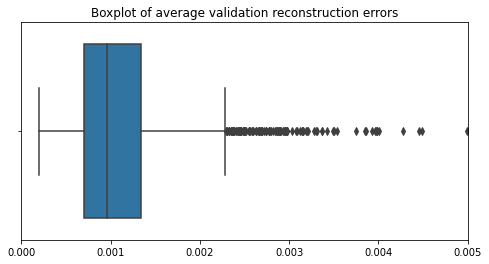

In [ ]:
# perform detection

# get validation reconstruction errors
_, validation_errors = autoencoder.predict(X2)

# plot distribution of average validation reconstruction errors 
f, ax = plt.subplots(1, figsize = (8,4))
sns.boxplot(validation_errors.mean(axis=1), ax=ax)
ax.set_xlim([0,0.005])
ax.set_title('Boxplot of average validation reconstruction errors')

# set treshold as quantile of average reconstruction error
theta = validation_errors.mean(axis = 1).quantile(0.995)

Yhat3, _ = autoencoder.detect(X3, theta = theta , window = 3, average=True)
# Yhat4, _ = autoencoder.detect(X4, theta = theta, window = 3, average=True)

In [ ]:
Yhat3

0       False
1       False
2       False
3        True
4        True
        ...  
4172    False
4173    False
4174    False
4175     True
4176     True
Length: 4177, dtype: bool

In [ ]:
Y3

0       0
1       0
2       0
3       0
4       0
       ..
4172    0
4173    0
4174    0
4175    0
4176    0
Name: ATT_FLAG, Length: 4177, dtype: int64

In [ ]:
results = pd.DataFrame(index = ['test dataset 01','test dataset 02'], 
                       columns = ['accuracy','f1_score','precision','recall'])
results.loc['test dataset 01'] = compute_scores(Y3,Yhat3)
# results.loc['test dataset 02'] = compute_scores(Y4,Yhat4)

print('Results:\n')
print(results)

Results:

                 accuracy  f1_score precision    recall
test dataset 01  0.932248  0.692725   0.74359  0.648374
test dataset 02       NaN       NaN       NaN       NaN


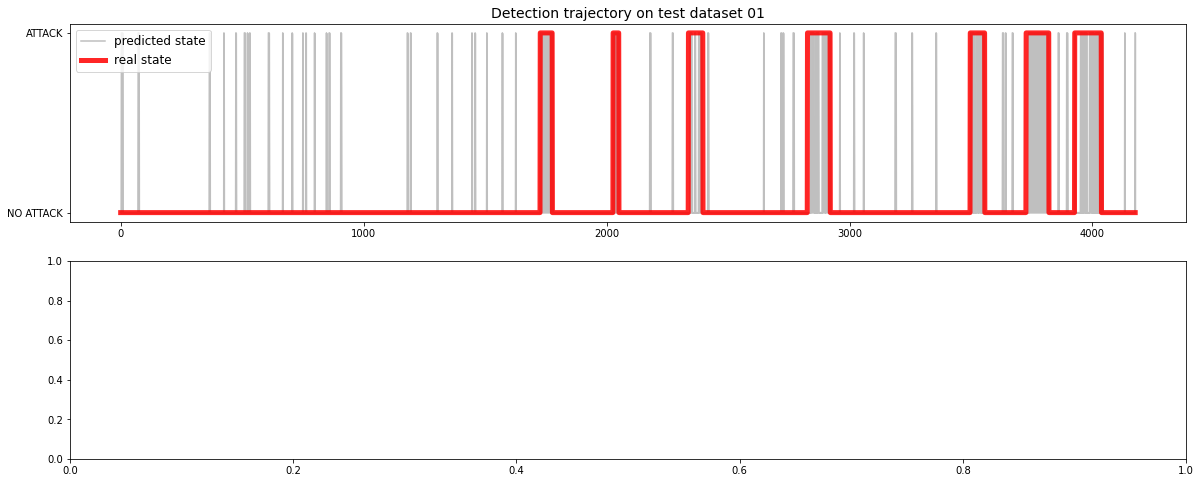

In [ ]:
# plot figures
shade_of_gray = '0.75'
f, axes = plt.subplots(2,figsize = (20,8))
axes[0].plot(Yhat3, color = shade_of_gray, label = 'predicted state')
axes[0].fill_between(Yhat3.index, Yhat3.values, where=Yhat3.values <=1, interpolate=True, color=shade_of_gray)
axes[0].plot(Y3, color = 'r', alpha = 0.85, lw = 5, label = 'real state')
axes[0].set_title('Detection trajectory on test dataset 01', fontsize = 14)
axes[0].set_yticks([0,1])
axes[0].set_yticklabels(['NO ATTACK','ATTACK'])
axes[0].legend(fontsize = 12, loc = 2)

# axes[1].plot(Yhat4, color = shade_of_gray, label = 'predicted state')
# axes[1].fill_between(Yhat4.index, Yhat4.values, where=Yhat4.values <=1, interpolate=True, color=shade_of_gray)
# axes[1].plot(Y4, color = 'r', alpha = 0.75, lw = 5, label = 'real state')
# axes[1].set_title('Detection trajectory on test dataset 02', fontsize = 14)
# axes[1].set_yticks([0,1])
# axes[1].set_yticklabels(['NO ATTACK','ATTACK'])

In [ ]:
# save autoencoder
autoencoder.save('/content/drive/MyDrive/Sensor hack/autoencoder')
# del autoencoder

Saved AEED parameters to /content/drive/MyDrive/Sensor hack/autoencoder.json.
Keras model saved to /content/drive/MyDrive/Sensor hack/autoencoder.h5


In [44]:
# load autoencoder
autoencoder = load_AEED('/content/drive/MyDrive/Sensor hack/autoencoder.json','/content/drive/MyDrive/Sensor hack/autoencoder.h5')

# get validation reconstruction errors
_, validation_errors = autoencoder.predict(X2)

In [31]:
theta = validation_errors.mean(axis = 1).quantile(0.995)

Yhat2, _ = autoencoder.detect(X2, theta = theta , window = 3, average=True)

In [33]:
Yhat2.value_counts()

False    2868
True       24
dtype: int64

# Result formation


In [5]:
import pandas as pd

In [51]:
df_test  = pd.read_csv("/content/drive/MyDrive/Sensor hack/Q1_IDS_test.csv")
df_test

,INDEX(TIME_IN_HOURS),L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,1,2.30,5.35,5.19,3.03,1.72,5.35,2.48,96.66,1,96.68,1,0.0,0,0.00,0,0,0,0.0,0,51.02,1,35.28,1,0,0,30.83,1,0,0,68.06,1,2.98,34.77,30.40,73.74,30.36,85.67,20.47,81.96,20.36,67.64,32.87,31.97
1,2,2.24,5.52,4.84,3.19,2.21,5.50,2.72,93.08,1,93.10,1,0.0,0,0.00,0,0,0,0.0,0,49.92,1,35.71,1,0,0,30.70,1,0,0,0.00,0,2.98,36.67,28.54,74.76,28.50,86.00,21.62,82.36,21.51,69.23,39.58,29.91
2,3,2.49,4.99,4.56,3.49,2.64,5.50,2.94,92.63,1,92.65,1,0.0,0,0.00,0,0,0,0.0,0,49.96,1,35.65,1,0,0,30.45,1,0,0,0.00,0,2.98,36.92,28.01,72.77,27.97,85.39,22.04,82.88,21.93,70.46,39.91,29.38
3,4,2.74,4.46,4.20,3.61,3.10,5.50,3.36,92.32,1,92.34,1,0.0,0,0.00,0,0,0,0.0,0,49.16,1,35.65,1,0,0,30.69,1,0,0,0.00,0,2.98,37.08,27.54,72.05,27.50,86.45,22.23,83.07,22.12,69.87,40.16,28.91
4,5,3.00,3.94,3.83,3.98,3.52,5.50,3.58,93.50,1,93.52,1,0.0,0,0.00,0,0,0,0.0,0,49.38,1,35.65,1,0,0,30.72,1,0,0,0.00,0,2.98,36.45,27.00,72.54,26.96,85.49,21.75,82.60,21.64,69.29,39.57,28.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1870,0.84,3.69,4.03,3.46,3.27,5.39,1.99,99.08,1,99.10,1,0.0,0,35.04,1,0,0,0.0,0,49.95,1,34.44,1,0,0,30.60,1,0,0,70.51,1,2.97,33.46,27.91,89.94,27.98,85.42,18.94,81.87,18.83,66.88,30.80,29.90
1870,1871,0.72,3.54,4.52,3.60,3.65,5.50,2.12,98.27,1,98.29,1,0.0,0,34.91,1,0,0,0.0,0,49.53,1,34.37,1,0,0,30.08,1,0,0,74.11,1,2.97,33.90,27.85,90.10,27.91,86.16,19.40,82.45,19.30,69.03,30.75,29.85
1871,1872,0.67,3.43,5.01,3.89,4.06,5.50,2.47,98.35,1,98.37,1,0.0,0,34.43,1,0,0,0.0,0,49.46,1,0.00,0,0,0,31.23,1,0,0,75.21,1,2.97,33.86,27.78,90.84,27.84,86.22,25.73,63.03,25.62,71.57,30.68,29.78
1872,1873,0.76,3.48,5.16,4.15,3.30,5.50,3.07,97.96,1,97.98,1,0.0,0,0.00,0,0,0,0.0,0,49.77,1,0.00,0,0,0,31.04,1,0,0,72.75,1,2.97,34.07,28.73,73.17,28.69,86.48,25.96,62.50,25.84,72.43,31.21,30.31


In [49]:
validation_errors

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
2484,0.000205,0.000096,0.000498,0.004732,0.000176,0.008854,0.006521,0.000003,0.000020,9.458915e-05,0.000692,0.000048,0.000169,0.000237,0.001551,0.000031,0.000127,7.033173e-06,0.000066,4.751614e-04,0.000415,0.000020,0.000724,7.343766e-05,1.337936e-04,0.000329,0.000283,6.307600e-04,6.786731e-05,0.003397,0.000285,1.821268e-04,0.000994,4.340596e-05,0.002385,0.000035,0.000145,0.000018,0.000036,0.000006,0.000002,2.010403e-04,0.000011
2531,0.000293,0.006225,0.000005,0.004132,0.000246,0.004452,0.000472,0.002496,0.000009,2.679277e-04,0.000274,0.000025,0.000110,0.000456,0.000634,0.000094,0.000107,1.754782e-05,0.000015,3.239183e-04,0.000146,0.000989,0.000619,1.877150e-05,3.260145e-05,0.002222,0.000237,3.837484e-05,1.043202e-05,0.000023,0.001135,8.441870e-07,0.000301,7.340824e-05,0.000229,0.000117,0.000045,0.001683,0.000285,0.001893,0.001447,3.534361e-05,0.000112
1699,0.000179,0.010330,0.005386,0.001098,0.000059,0.001485,0.013661,0.000245,0.000019,2.546168e-04,0.000346,0.000202,0.000042,0.001108,0.000221,0.000030,0.000105,5.997058e-05,0.000083,3.953254e-04,0.000190,0.000275,0.000864,8.674146e-05,2.842569e-08,0.000157,0.000490,3.740063e-05,1.078201e-04,0.001558,0.000395,1.180668e-03,0.000262,7.509336e-04,0.002274,0.001012,0.001951,0.000120,0.001658,0.000023,0.001477,1.332844e-04,0.001169
2373,0.000336,0.000682,0.001268,0.000003,0.000117,0.003185,0.000108,0.000395,0.000044,1.661739e-05,0.000012,0.000004,0.000050,0.000051,0.000006,0.000075,0.000050,3.008651e-07,0.000505,3.835250e-04,0.000203,0.000073,0.000434,6.650148e-07,3.248801e-05,0.000099,0.000259,1.319153e-04,3.170852e-08,0.001398,0.000708,1.034284e-05,0.001696,1.903813e-05,0.002919,0.000348,0.000208,0.000606,0.000898,0.000078,0.000010,6.973560e-04,0.000008
3767,0.002340,0.000673,0.001271,0.000029,0.000132,0.000890,0.000732,0.000012,0.000014,1.682919e-03,0.000364,0.000008,0.000116,0.000499,0.000884,0.000002,0.000004,5.799527e-05,0.000007,6.290802e-08,0.000179,0.000135,0.000910,1.587460e-06,2.862053e-05,0.000612,0.000162,6.684346e-05,9.438852e-05,0.000254,0.000214,1.989904e-06,0.001692,1.396884e-04,0.001772,0.000079,0.000044,0.000164,0.001236,0.000020,0.000305,5.888354e-05,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,0.001585,0.001246,0.000072,0.000920,0.000675,0.002338,0.000005,0.000040,0.000094,1.957449e-07,0.000420,0.000864,0.000152,0.000016,0.000821,0.000022,0.000017,2.889016e-04,0.000021,2.430878e-06,0.000246,0.000011,0.000333,6.449363e-05,1.132620e-04,0.000075,0.000246,2.585767e-05,4.141348e-06,0.013872,0.000086,1.939622e-05,0.000480,4.761520e-04,0.005885,0.000076,0.000278,0.001460,0.000005,0.000311,0.000175,1.594560e-03,0.000014
4051,0.000073,0.002431,0.000271,0.000061,0.000158,0.002770,0.000290,0.000275,0.000037,1.696405e-04,0.000339,0.000015,0.000074,0.003995,0.005519,0.000031,0.000013,1.859504e-05,0.000004,1.764715e-04,0.000118,0.000013,0.000604,2.309975e-07,2.079505e-05,0.000016,0.000213,5.767735e-07,9.761475e-05,0.000449,0.000487,4.701133e-04,0.000017,5.387213e-05,0.004867,0.000070,0.001120,0.000688,0.000270,0.000637,0.000097,1.858713e-04,0.000023
7213,0.000055,0.001421,0.000207,0.001538,0.000348,0.004793,0.008462,0.000057,0.000002,7.317453e-05,0.000811,0.000020,0.000003,0.000025,0.002077,0.000015,0.000039,4.179830e-04,0.000413,7.422024e-05,0.000491,0.000024,0.000525,1.680091e-05,1.664537e-05,0.000120,0.000293,7.791608e-06,1.819020e-06,0.000232,0.000598,9.136196e-05,0.000587,2.702554e-04,0.000302,0.000623,0.000027,0.001245,0.000510,0.001396,0.000143,4.132437e-05,0.000242
4692,0.005466,0.000043,0.000082,0.000064,0.000601,0.008333,0.004286,0.003206,0.000012,1.517655e-05,0.00

In [52]:
_, validation_errors = autoencoder.predict(X_test)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sensor_cols = [col for col in df_test.columns if col not in ['INDEX(TIME_IN_HOURS)']]
X_test = pd.DataFrame(index = df_test.index, columns = sensor_cols, data = scaler.fit_transform(df_test[sensor_cols]))
autoencoder = load_AEED('/content/drive/MyDrive/Sensor hack/autoencoder.json','/content/drive/MyDrive/Sensor hack/autoencoder.h5')
theta = validation_errors.mean(axis = 1).quantile(0.995)
print(theta)
y_pred, _ =  autoencoder.detect(X_test, theta = theta , window = 3, average=True)

y_pred

0.13462535193722985


0       False
1       False
2       False
3       False
4       False
        ...  
1869    False
1870    False
1871    False
1872    False
1873    False
Length: 1874, dtype: bool

In [54]:
y_pred.value_counts()

False    1865
True        9
dtype: int64

In [55]:
df_test["LABEL"] = y_pred

In [56]:
df_test


,INDEX(TIME_IN_HOURS),L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,LABEL
0,1,2.30,5.35,5.19,3.03,1.72,5.35,2.48,96.66,1,96.68,1,0.0,0,0.00,0,0,0,0.0,0,51.02,1,35.28,1,0,0,30.83,1,0,0,68.06,1,2.98,34.77,30.40,73.74,30.36,85.67,20.47,81.96,20.36,67.64,32.87,31.97,False
1,2,2.24,5.52,4.84,3.19,2.21,5.50,2.72,93.08,1,93.10,1,0.0,0,0.00,0,0,0,0.0,0,49.92,1,35.71,1,0,0,30.70,1,0,0,0.00,0,2.98,36.67,28.54,74.76,28.50,86.00,21.62,82.36,21.51,69.23,39.58,29.91,False
2,3,2.49,4.99,4.56,3.49,2.64,5.50,2.94,92.63,1,92.65,1,0.0,0,0.00,0,0,0,0.0,0,49.96,1,35.65,1,0,0,30.45,1,0,0,0.00,0,2.98,36.92,28.01,72.77,27.97,85.39,22.04,82.88,21.93,70.46,39.91,29.38,False
3,4,2.74,4.46,4.20,3.61,3.10,5.50,3.36,92.32,1,92.34,1,0.0,0,0.00,0,0,0,0.0,0,49.16,1,35.65,1,0,0,30.69,1,0,0,0.00,0,2.98,37.08,27.54,72.05,27.50,86.45,22.23,83.07,22.12,69.87,40.16,28.91,False
4,5,3.00,3.94,3.83,3.98,3.52,5.50,3.58,93.50,1,93.52,1,0.0,0,0.00,0,0,0,0.0,0,49.38,1,35.65,1,0,0,30.72,1,0,0,0.00,0,2.98,36.45,27.00,72.54,26.96,85.49,21.75,82.60,21.64,69.29,39.57,28.37,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1870,0.84,3.69,4.03,3.46,3.27,5.39,1.99,99.08,1,99.10,1,0.0,0,35.04,1,0,0,0.0,0,49.95,1,34.44,1,0,0,30.60,1,0,0,70.51,1,2.97,33.46,27.91,89.94,27.98,85.42,18.94,81.87,18.83,66.88,30.80,29.90,False
1870,1871,0.72,3.54,4.52,3.60,3.65,5.50,2.12,98.27,1,98.29,1,0.0,0,34.91,1,0,0,0.0,0,49.53,1,34.37,1,0,0,30.08,1,0,0,74.11,1,2.97,33.90,27.85,90.10,27.91,86.16,19.40,82.45,19.30,69.03,30.75,29.85,False
1871,1872,0.67,3.43,5.01,3.89,4.06,5.50,2.47,98.35,1,98.37,1,0.0,0,34.43,1,0,0,0.0,0,49.46,1,0.00,0,0,0,31.23,1,0,0,75.21,1,2.97,33.86,27.78,90.84,27.84,86.22,25.73,63.03,25.62,71.57,30.68,29.78,False
1872,1873,0.76,3.48,5.16,4.15,3.30,5.50,3.07,97.96,1,97.98,1,0.0,0,0.00,0,0,0,0.0,0,49.77,1,0.00,0,0,0,31.04,1,0,0,72.75,1,2.97,34.07,28.73,73.17,28.69,86.48,25.96,62.50,25.84,72.43,31.21,30.31,False


In [60]:
result  = pd.DataFrame()
result["INDEX(TIME_IN_HOURS)"] = df_test["INDEX(TIME_IN_HOURS)"]
result["LABEL"] = df_test["LABEL"].apply(lambda x: "ATTACK" if x ==True else "NO ATTACK" )
result

,INDEX(TIME_IN_HOURS),LABEL
0,1,NO ATTACK
1,2,NO ATTACK
2,3,NO ATTACK
3,4,NO ATTACK
4,5,NO ATTACK
...,...,...
1869,1870,NO ATTACK
1870,1871,NO ATTACK
1871,1872,NO ATTACK
1872,1873,NO ATTACK


In [62]:
result.to_csv("/content/drive/MyDrive/Sensor hack/result.csv",index=False)